In [34]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:20pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

# 1. 데이터 생성
- 남자, 여자 데이터 생성 군집화

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [27]:
random.randint(40, 70) # 40~70 중 하나

56

In [48]:
data = []
for i in range(50):
    data.append([random.randint(40,70),  random.randint(140,175)]) # 여자
    data.append([random.randint(60,110), random.randint(170,200)]) # 남자

In [49]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
print('\n---------------------')
for male in data[1:100:2]:
    print(male, end= ' ')

[41, 140] [44, 145] [57, 172] [51, 159] [69, 169] [70, 162] [70, 146] [67, 167] [40, 168] [42, 150] [42, 165] [52, 170] [66, 159] [51, 172] [54, 143] [44, 143] [61, 170] [51, 158] [62, 157] [44, 169] [58, 143] [70, 156] [49, 158] [55, 161] [62, 173] [42, 155] [47, 166] [61, 155] [64, 161] [58, 142] [65, 158] [55, 146] [67, 146] [59, 172] [59, 153] [56, 157] [60, 159] [62, 161] [63, 157] [67, 167] [40, 170] [52, 146] [46, 155] [66, 144] [63, 150] [54, 152] [62, 171] [47, 162] [51, 148] [42, 169] 
---------------------
[84, 170] [81, 174] [105, 190] [64, 187] [100, 191] [98, 186] [105, 179] [75, 196] [82, 189] [78, 192] [66, 177] [84, 182] [61, 181] [65, 171] [100, 185] [84, 186] [85, 181] [91, 172] [100, 177] [93, 171] [92, 176] [74, 170] [94, 170] [96, 198] [95, 190] [104, 200] [92, 197] [88, 174] [65, 186] [109, 176] [76, 191] [102, 181] [84, 170] [89, 179] [99, 174] [78, 170] [102, 194] [75, 184] [91, 174] [80, 182] [106, 193] [106, 174] [61, 185] [97, 191] [92, 171] [66, 195] [79, 1

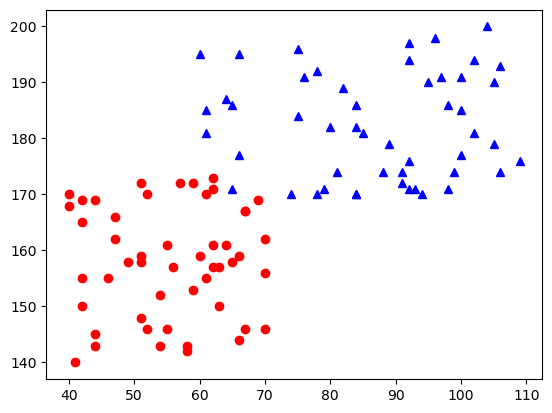

In [50]:
# x:몸무게, y:키
# print('여자 몸무게(x) : ', [d[0] for d in data[:100:2]])
# print('여자 신장(y)  : ', [d[1] for d in data[:100:2]])
# print('남자 몸무게(x) : ', [d[0] for d in data[1:100:2]])
# print('남자 신장(y)  : ', [d[1] for d in data[1:100:2]])
plt.plot([d[0] for d in data[:100:2]],
         [d[1] for d in data[:100:2]], 'o', color='r')
plt.plot([d[0] for d in data[1:100:2]],
         [d[1] for d in data[1:100:2]], '^', color='b')
plt.show()

# 2. 군집화 로직

In [52]:
# 초기 랜덤 지점 2개 (40~110, 140~200)
random_points = [[random.randint(40,110), random.randint(140, 200)],
                 [random.randint(40,110), random.randint(140, 200)]]
print('초기 랜덤 기준점 :', random_points)

초기 랜덤 기준점 : [[105, 151], [51, 182]]


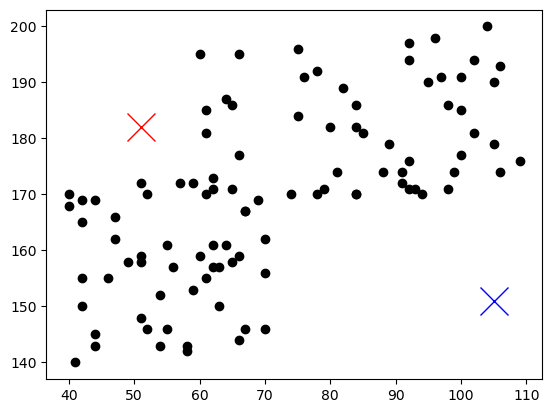

In [60]:
# plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)

In [65]:
# 두 점 사이의 거리를 return하는 함수   a=[0,0] ~ b=[3,4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1]-b[1])**2)
dist((1,1), [4,5])

5.0

In [67]:
dist(random_points[0], random_points[1])

62.26556030423239

In [68]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = [] # random_points[0]이 더 가까운 group
group1 = []
for d in data:
    if dist(random_points[0], d) <= dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(29, 71)

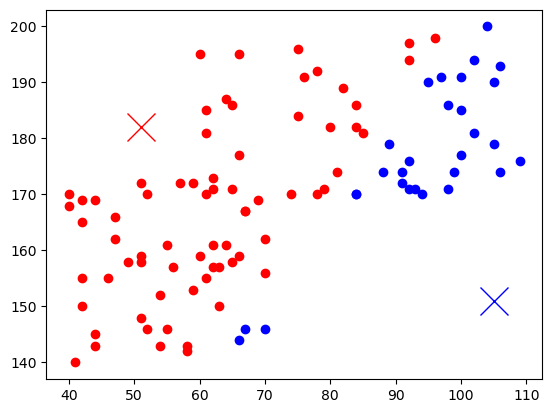

In [70]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')

In [73]:
print('초기 랜덤 지점 :', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points 할당
sumX=0; sumY=0
for g in group0:
    sumX += g[0] # x축값 누적
    sumY += g[1] 
new_points = [] # 새로운 기준점
new_points.append([sumX/len(group0), sumY/len(group0)]) #group0의 중간지점
sumX=0; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group1), sumY/len(group1)]) # group1의 중간지점
print('새로운 기준점 :', new_points)

초기 랜덤 지점 : [[105, 151], [51, 182]]
새로운 기준점 : [[94.03448275862068, 176.3793103448276], [61.91549295774648, 167.53521126760563]]


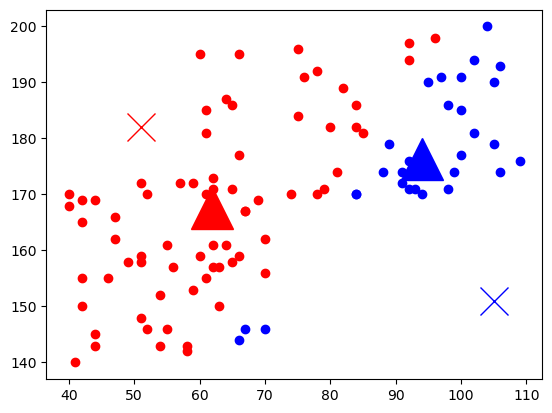

In [75]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=30)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=30)

In [79]:
# new_points[0]과 new_points[1]을 두 영역을 나눔
group0 = []
group1 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(40, 60)

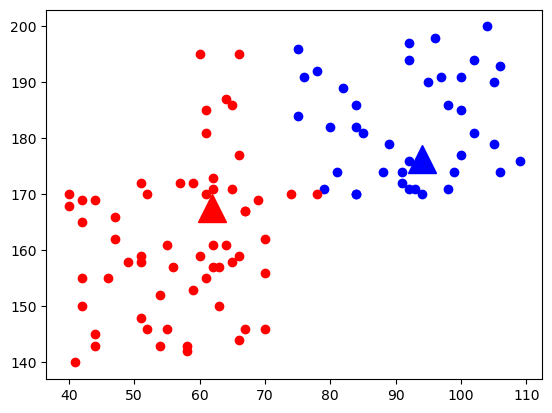

In [84]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=20)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=20)

# 3. 전체코드(for문 사용)

1 번째 기준점 : [[40, 174], [52, 156]]
2 번째 기준점 : [[60.476190476190474, 181.8095238095238], [76.58227848101266, 167.58227848101265]]
3 번째 기준점 : [[57.0, 174.82758620689654], [79.8169014084507, 168.83098591549296]]
4 번째 기준점 : [[54.28888888888889, 163.33333333333334], [88.67272727272727, 176.4909090909091]]
5 번째 기준점 : [[55.76470588235294, 158.5686274509804], [91.34693877551021, 183.0612244897959]]
6 번째 기준점 : [[55.88235294117647, 158.37254901960785], [91.22448979591837, 183.26530612244898]]
7 번째 기준점 : [[55.88235294117647, 158.37254901960785], [91.22448979591837, 183.26530612244898]]
8 번째 기준점 : [[55.88235294117647, 158.37254901960785], [91.22448979591837, 183.26530612244898]]
9 번째 기준점 : [[55.88235294117647, 158.37254901960785], [91.22448979591837, 183.26530612244898]]
10 번째 기준점 : [[55.88235294117647, 158.37254901960785], [91.22448979591837, 183.26530612244898]]


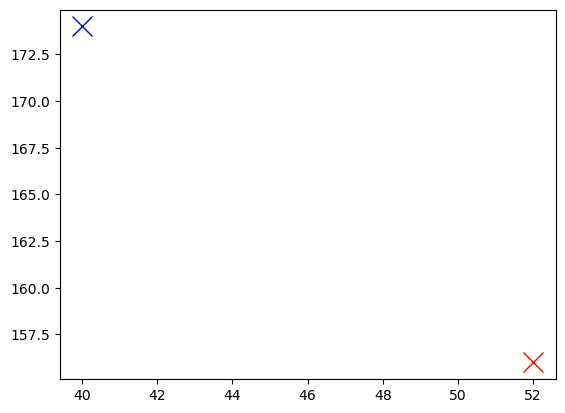

In [89]:
# 두 점 사이의 거리를 return하는 함수   a=[0,0] ~ b=[3,4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1]-b[1])**2)
data = []
for i in range(50):
    data.append([random.randint(40,70),  random.randint(140,175)]) # 여자
    data.append([random.randint(60,110), random.randint(170,200)]) # 남자
    
points = [[random.randint(40,110), random.randint(140,200)],
          [random.randint(40,110), random.randint(140,200)]]
plt.plot(points[0][0], points[0][1], 'x', color='b', markersize=15)
plt.plot(points[1][0], points[1][1], 'x', color='r', markersize=15)

for i in range(1, 11):
    print(i, '번째 기준점 :', points)
    group0 = []
    group1 = []
    for d in data:
        if dist(points[0], d) <= dist(points[1],d):
            group0.append(d)
        else:
            group1.append(d)
    sumX = 0; sumY=0
    points = []
    for g in group0:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX/len(group0), sumY/len(group0)]) # group0들의 중심점
    sumX = 0 ; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX/len(group1), sumY/len(group1)]) # group1들의 중심점